# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">📑. Decision Tree/ RandomForest Classifier Tutorial with Python</p>

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Import Required Libraries 📚</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

ModuleNotFoundError: No module named 'graphviz'

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Overview dataset 🕵🏻🩻</p>

In [20]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**age**: Tuổi.

**sex**: Giới tính.

**chest pain type (4 values)**: Loại đau ngực (4 giá trị).

**resting blood pressure**: Huyết áp khi nghỉ ngơi.

**serum cholestoral in mg/dl**: Lượng cholesterol trong máu (mg/dl).

**fasting blood sugar > 120 mg/dl**: Lượng đường trong máu lúc đói > 120 mg/dl.

**resting electrocardiographic results (values 0,1,2)**: Kết quả điện tâm đồ khi nghỉ (giá trị 0, 1, 2).

**maximum heart rate achieved**: Nhịp tim tối đa đạt được.

**exercise induced angina**: Đau thắt ngực do tập thể dục.

**oldpeak** = ST depression induced by exercise relative to rest: Độ giảm ST gây ra do tập thể dục so với trạng thái nghỉ.

**the slope of the peak exercise ST segment**: Độ dốc của đoạn ST tại đỉnh tập luyện.

**number of major vessels (0-3) colored by flourosopy**: Số lượng mạch máu chính (0-3) được làm nổi bật bằng phương pháp chụp X-quang huỳnh quang.

**thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect: Thalassemia (0 = bình thường; 1 = khiếm khuyết cố định; 2 = khiếm khuyết có thể phục hồi).

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Exploratoty Data Analysis (EDA) 📊</p>

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [23]:
df.isnull().sum().sum()

0

### <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Target label distribution</p>

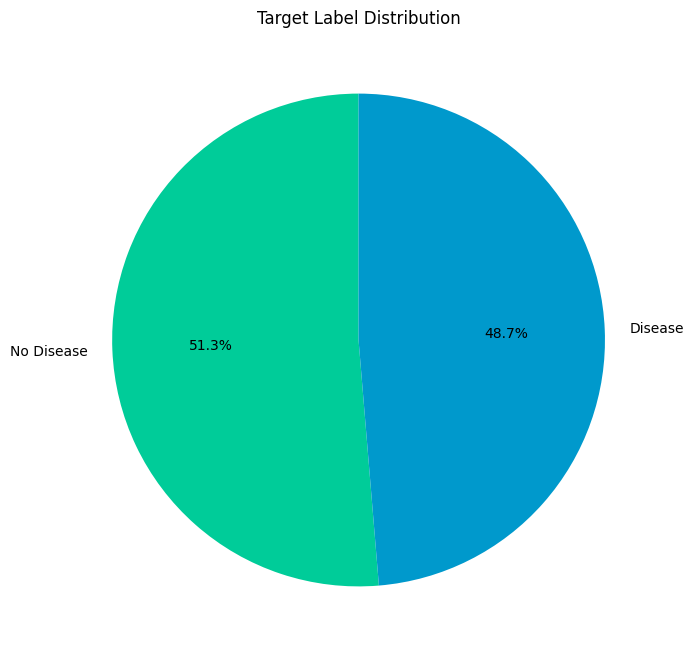

In [24]:
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=90, colors=['#00cc99', '#0099cc'])
plt.title('Target Label Distribution')
plt.show()

### <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Age distribution</p>

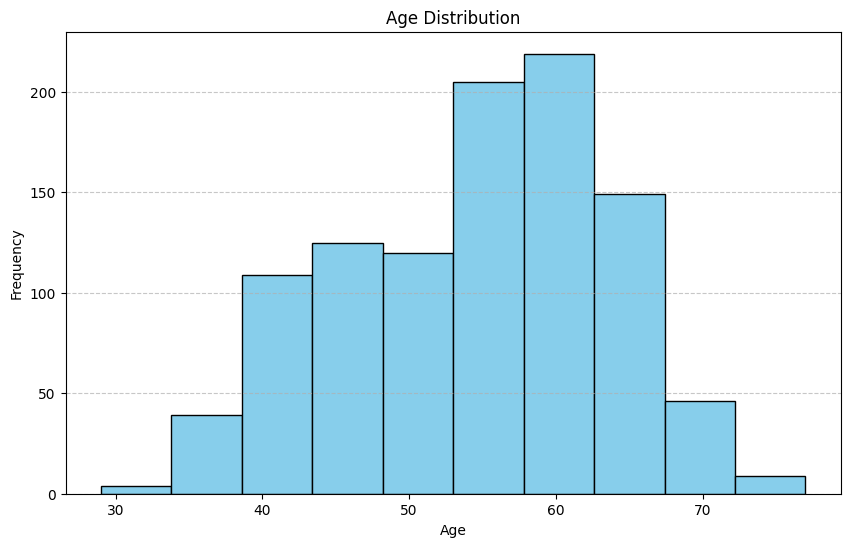

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Sex distribution</p>

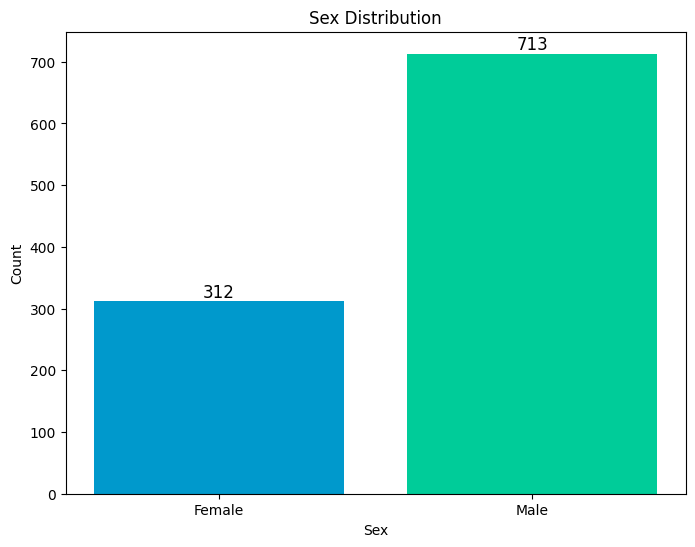

In [26]:
plt.figure(figsize=(8, 6))
sex_counts = df['sex'].value_counts()
bars = plt.bar(sex_counts.index, sex_counts.values, color=['#00cc99', '#0099cc'])
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),  
        str(bar.get_height()),  
        ha='center', 
        va='bottom', 
        fontsize=12 
    )
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Cholesterol by target</p>

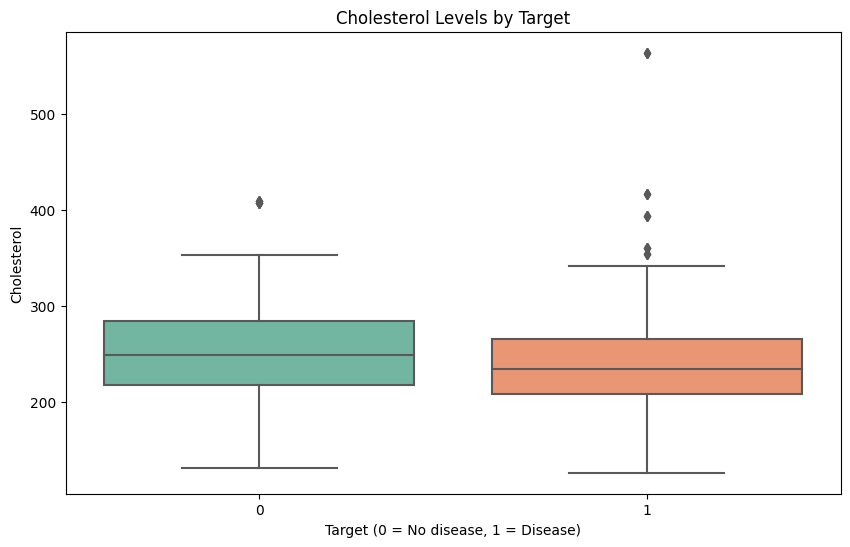

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholesterol Levels by Target')
plt.xlabel('Target (0 = No disease, 1 = Disease)')
plt.ylabel('Cholesterol')
plt.show()

### <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Age vs max heart rate (thalach)</p>

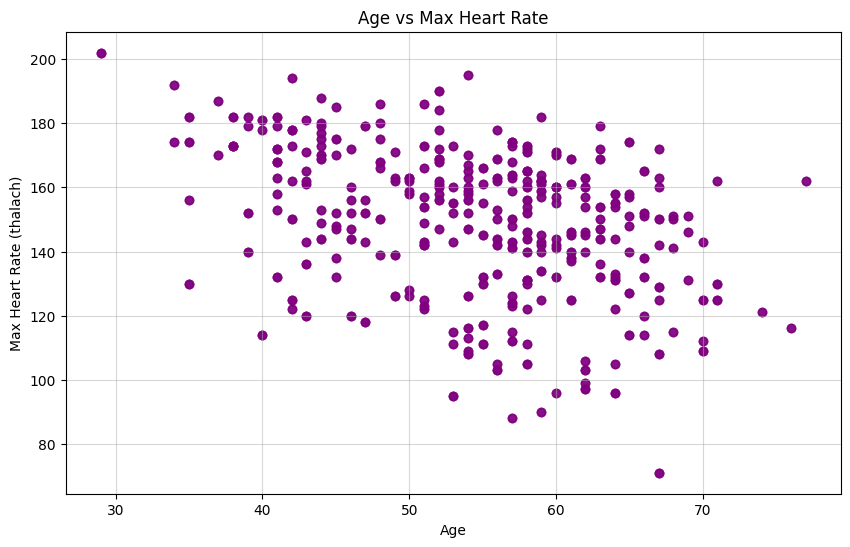

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['thalach'], color='purple', alpha=0.6)
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.grid(alpha=0.5)
plt.show()

### <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Correlation matrix</p>

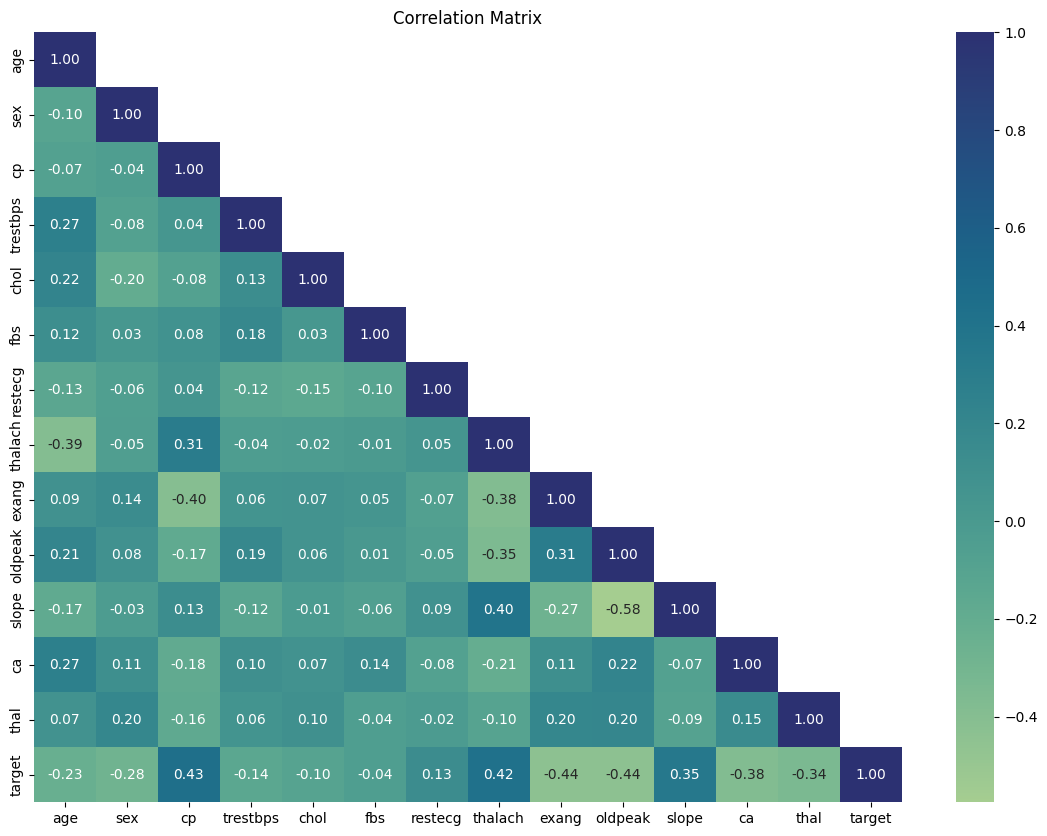

In [32]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cbar=True, cmap="crest")
plt.title('Correlation Matrix')
plt.show()

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Data Preprocessing 🧩</p>

In [33]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((820, 13), (205, 13))

In [34]:
stander = StandardScaler()
X_train = stander.fit_transform(X_train)
X_test = stander.transform(X_test)

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Model definition and evaluation 🤖</p>

In [35]:
def Gridsearch_params(X, y, model, param_grid, k=5):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=k,  
        scoring='accuracy', 
        verbose=1,  
        n_jobs=-1  
    )
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean cross-validation accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")
    
    return best_model

In [36]:
def evolution_models(model):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------")

    labels = df['target'].unique()
    labels = list(labels)

    # Caculater to Confution Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="crest", xticklabels=labels, yticklabels=labels)
    plt.title("Confution matrix heatmap:")
    plt.xlabel("Actual labels")
    plt.ylabel("Predicted labels")
    plt.show()

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Decision Tree Classifier with criterion Gini Index</p>

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------


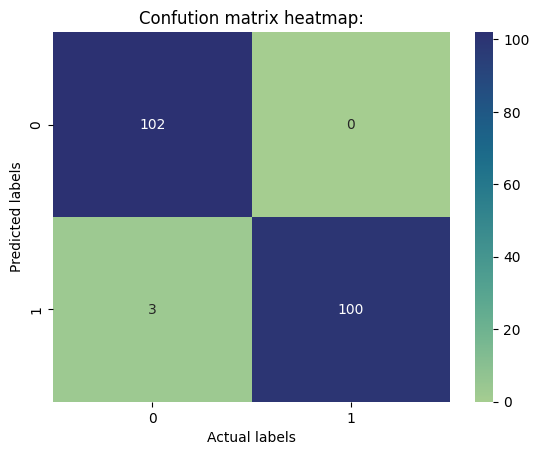

In [37]:
tree_gini = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)
evolution_models(tree_gini)

[Text(0.5315126050420168, 0.9545454545454546, 'x[2] <= -0.435\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.28781512605042014, 0.8636363636363636, 'x[11] <= -0.243\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.18907563025210083, 0.7727272727272727, 'x[12] <= 0.283\ngini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.09243697478991597, 0.6818181818181818, 'x[8] <= 0.326\ngini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.03361344537815126, 0.5909090909090909, 'x[7] <= -2.307\ngini = 0.146\nsamples = 63\nvalue = [5, 58]'),
 Text(0.01680672268907563, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05042016806722689, 0.5, 'x[4] <= 1.439\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.03361344537815126, 0.4090909090909091, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.06722689075630252, 0.4090909090909091, 'x[3] <= 0.186\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.05042016806722689, 0.3181818181818182, 'gini = 0.0\nsamples

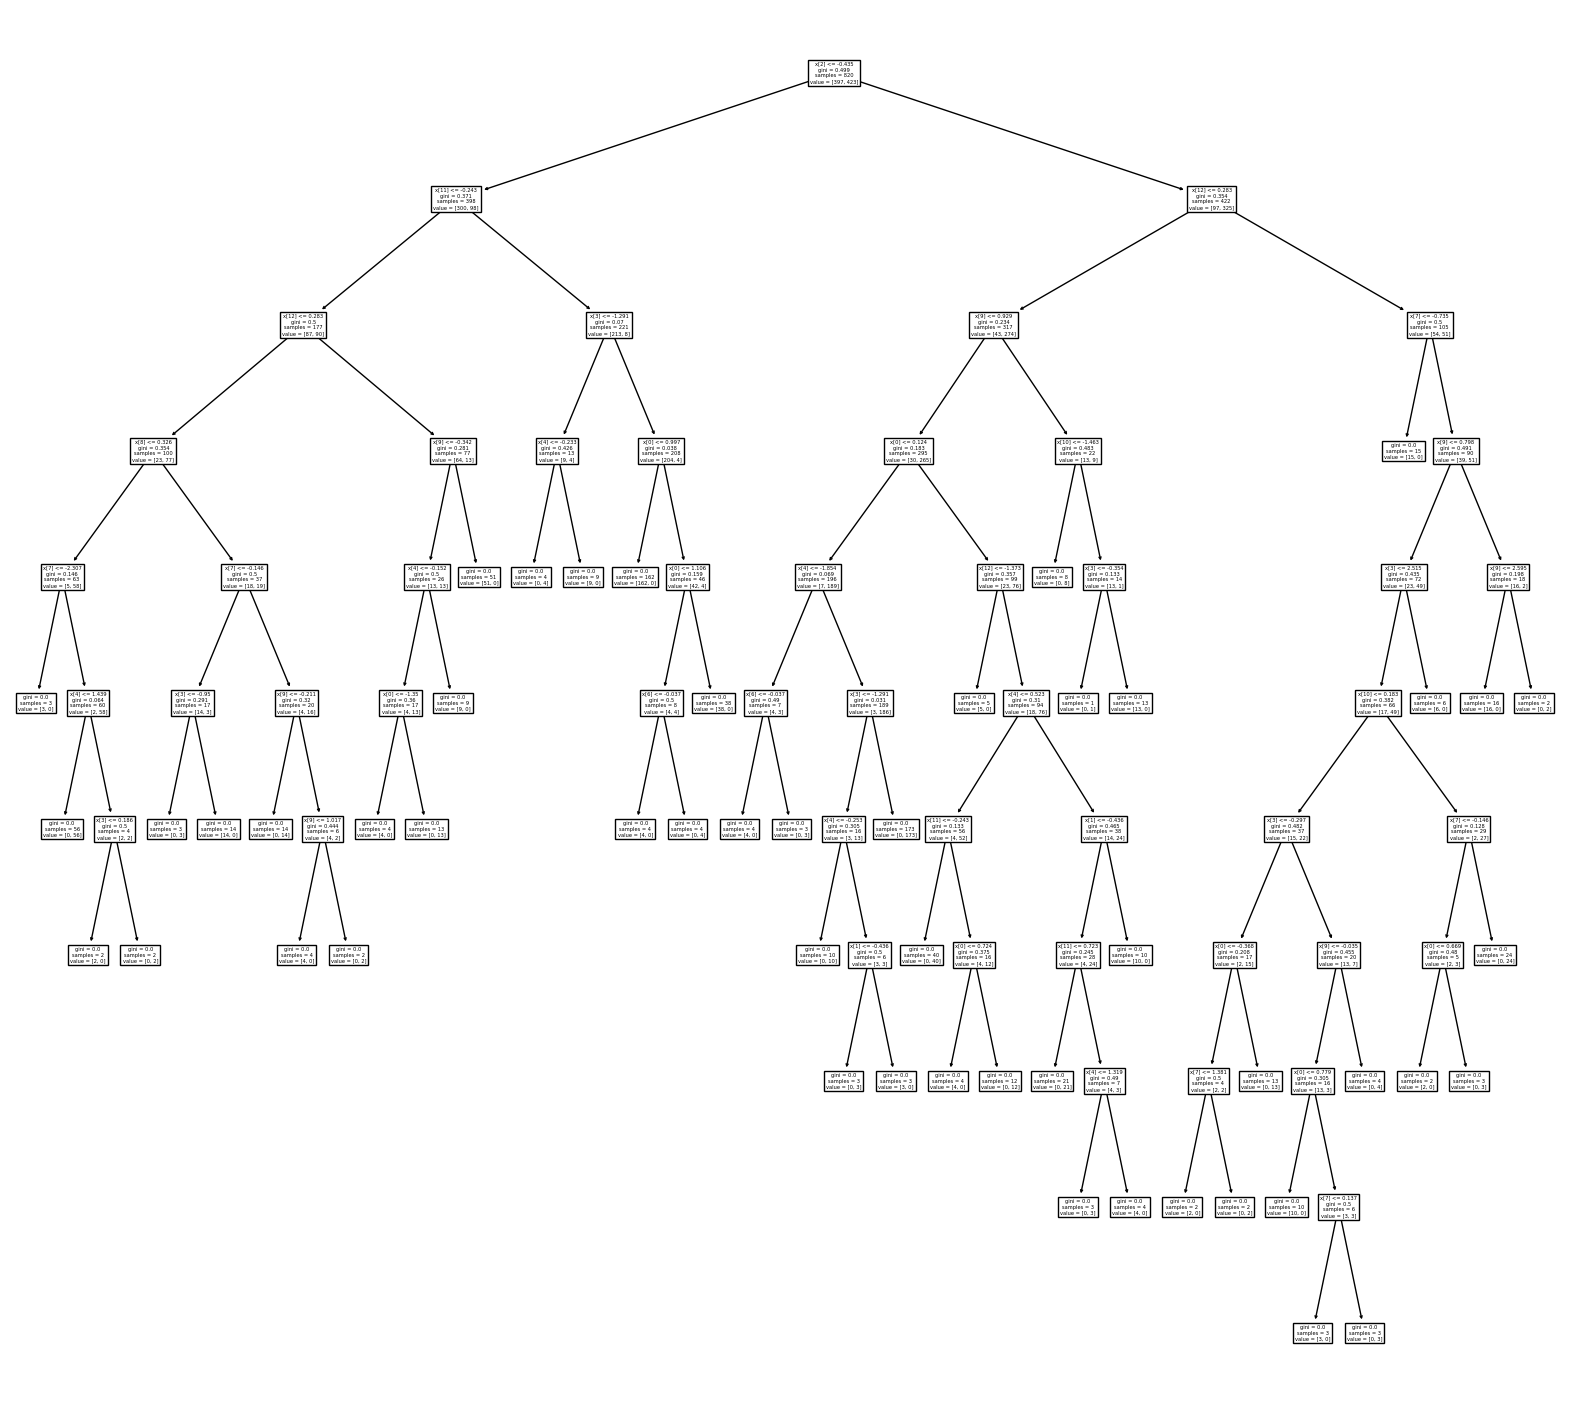

In [38]:
plt.figure(figsize=(20,18))
tree.plot_tree(tree_gini) 

In [39]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [40]:
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
class_names = ["No Disease", "Disease"]

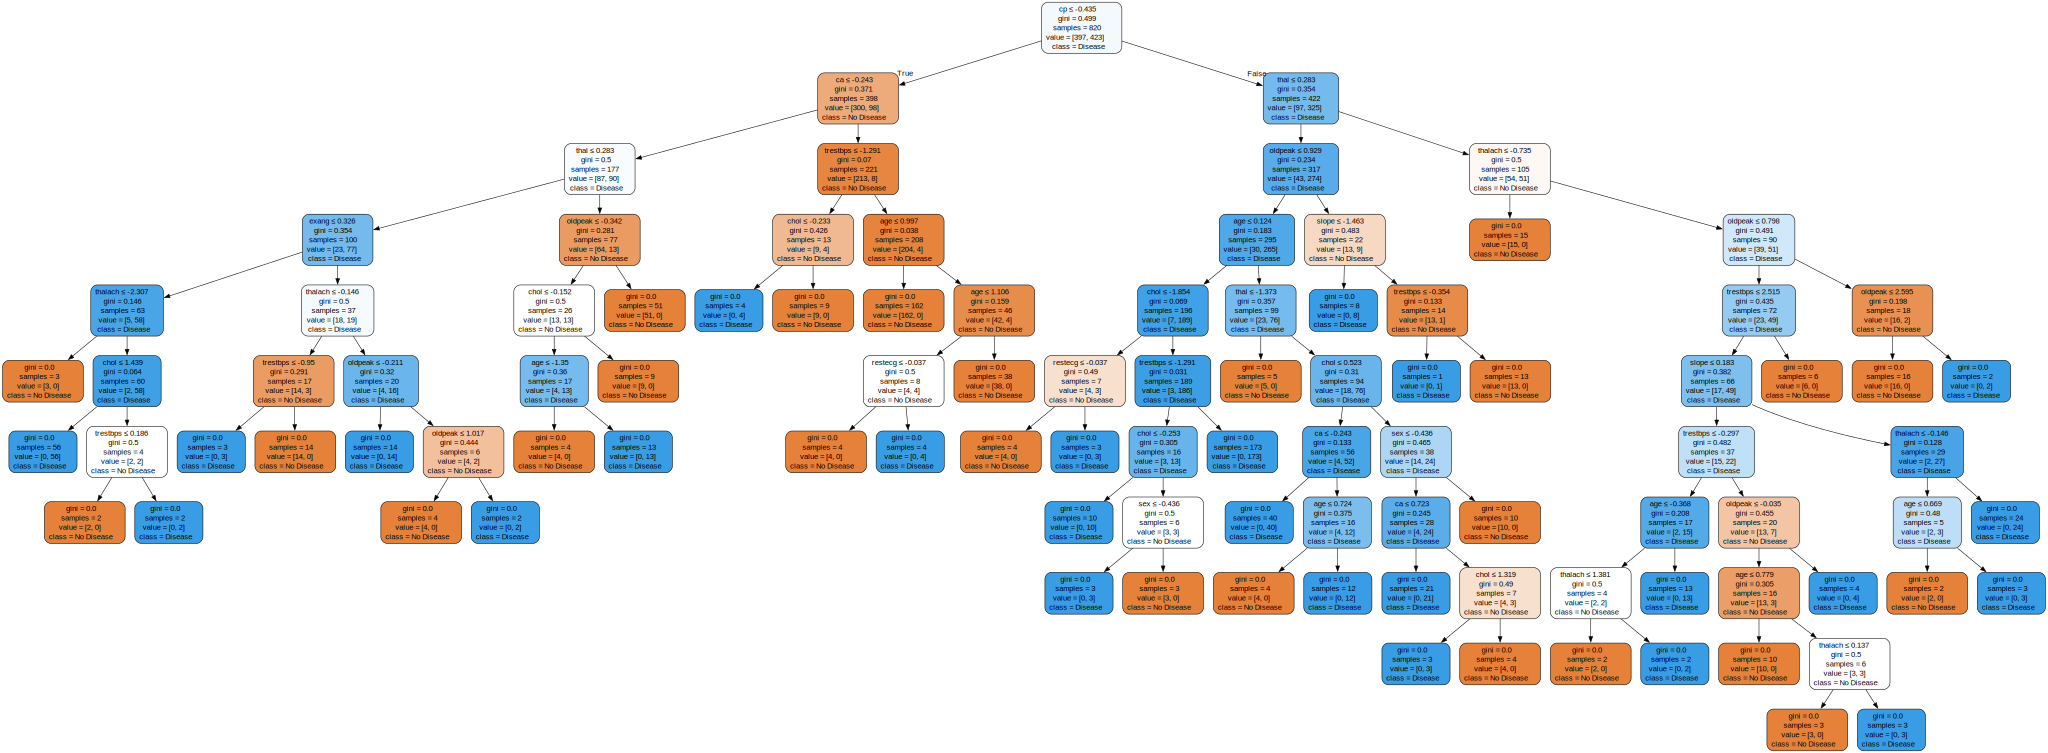

In [41]:
dot_data = tree.export_graphviz(tree_gini, out_file=None, 
                              feature_names=feature_names,  
                              class_names=class_names,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data)
graph 

### **Describe the values ​​on the chart**


* **cp <= -0.435**
    - If the cp value is less than or equal to -0.455, data goes down the left branch, otherwise it goes down the right branch
    - cp is the name of the feature

* **gini = 0.499**
    - Gini impurity measures the degree of mixture (impurity) of labels at this node.
 
* **sample = 820**
    - Number of data samples at this node
 
* **value = [397, 423]**
    - Distribution of number of samples according to each label:
        * 397: Number of samples belonging to **class 0**.
        * 423: Number of samples belonging to **class 1**.

* **class = Disease**
    - This is the node's final prediction

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

------------------------------------------


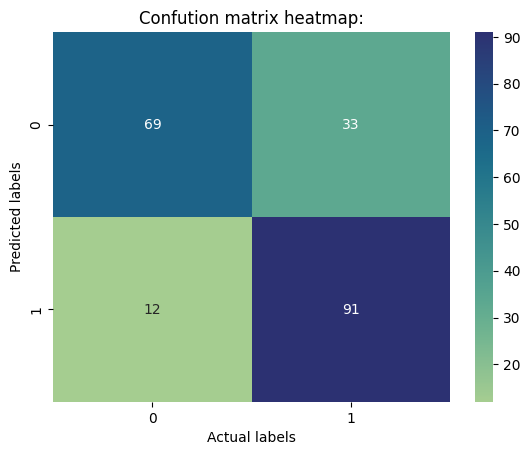

In [48]:
tree_gini_2 = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(X_train, y_train)
evolution_models(tree_gini_2)

[Text(0.5, 0.875, 'x[2] <= -0.435\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.25, 0.625, 'x[11] <= -0.243\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.125, 0.375, 'x[12] <= 0.283\ngini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.0625, 0.125, 'gini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.1875, 0.125, 'gini = 0.281\nsamples = 77\nvalue = [64, 13]'),
 Text(0.375, 0.375, 'x[3] <= -1.291\ngini = 0.07\nsamples = 221\nvalue = [213, 8]'),
 Text(0.3125, 0.125, 'gini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.4375, 0.125, 'gini = 0.038\nsamples = 208\nvalue = [204, 4]'),
 Text(0.75, 0.625, 'x[12] <= 0.283\ngini = 0.354\nsamples = 422\nvalue = [97, 325]'),
 Text(0.625, 0.375, 'x[9] <= 0.929\ngini = 0.234\nsamples = 317\nvalue = [43, 274]'),
 Text(0.5625, 0.125, 'gini = 0.183\nsamples = 295\nvalue = [30, 265]'),
 Text(0.6875, 0.125, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.875, 0.375, 'x[7] <= -0.735\ngini = 0.5\nsamples = 105\nv

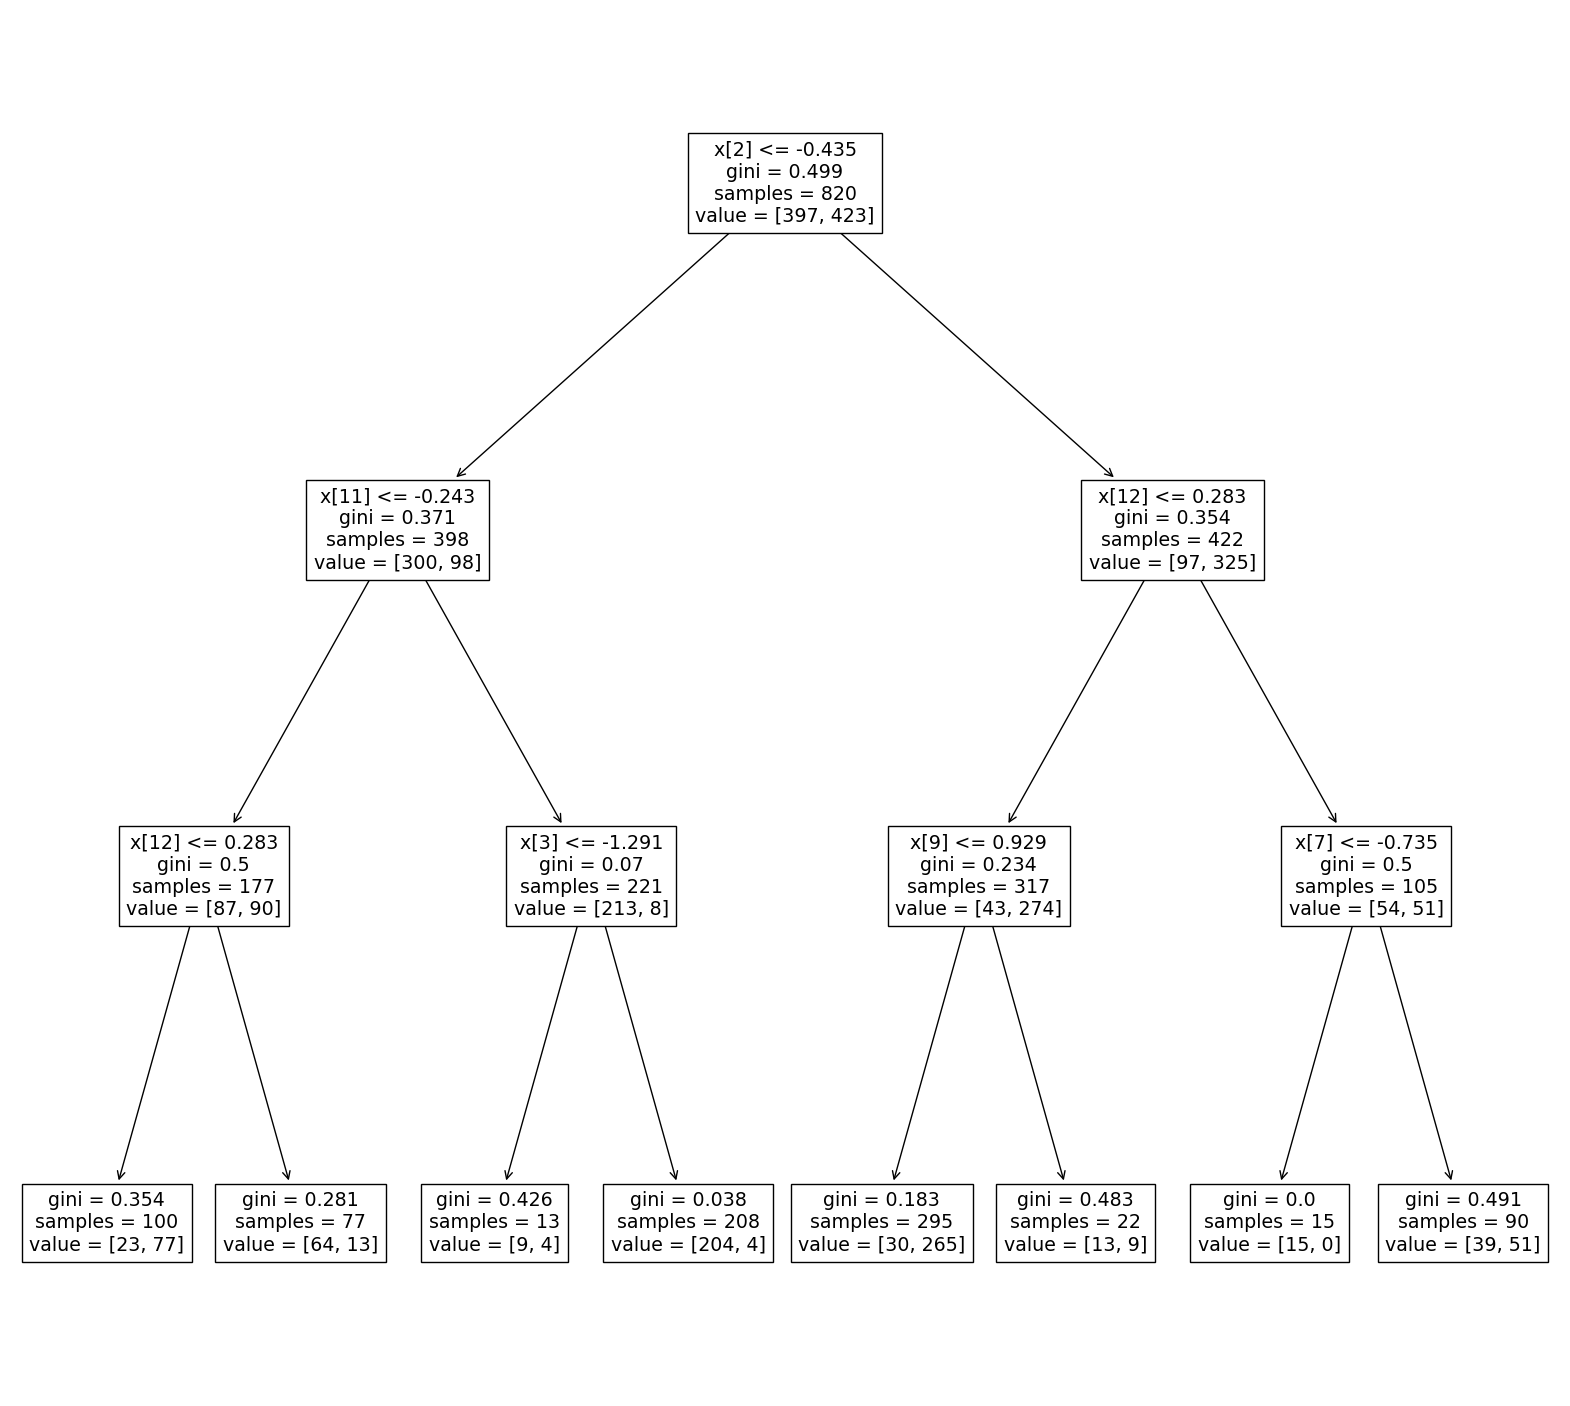

In [49]:
plt.figure(figsize=(20,18))
tree.plot_tree(tree_gini_2) 

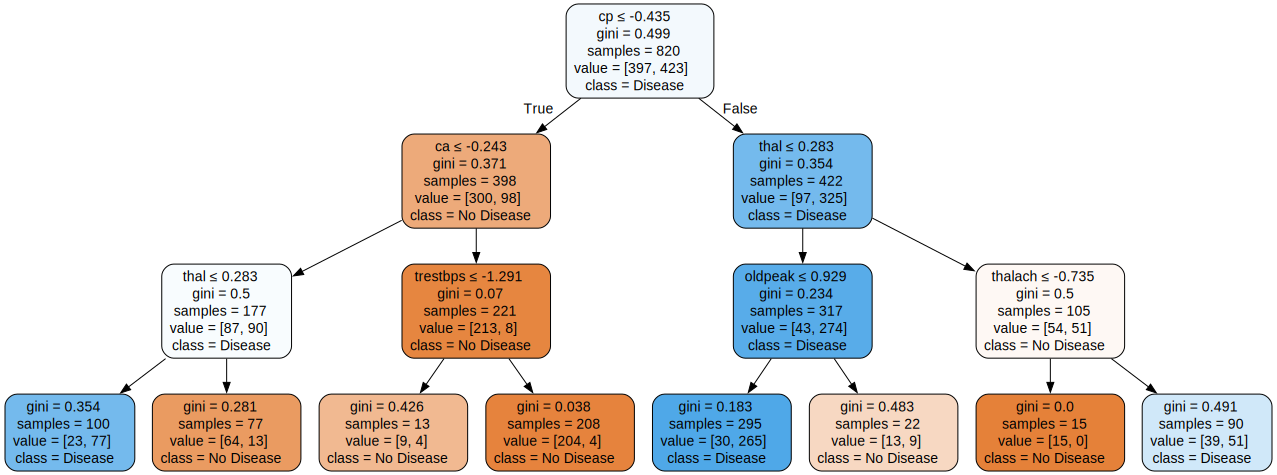

In [50]:
dot_data = tree.export_graphviz(tree_gini_2, out_file=None, 
                              feature_names=feature_names,  
                              class_names=class_names,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data)
graph 

### `Apply Grid Search to adjust the hyperparameters combined with the Gini Index`

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best mean cross-validation accuracy: 98.05 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------


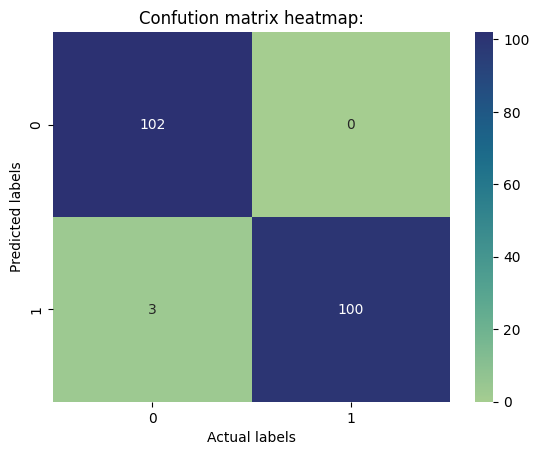

In [95]:
gr_gini = DecisionTreeClassifier(criterion='gini')

param_grid = {
    'max_depth': [3, 5, 10, None],  # Limit the depth of the tree to avoid overfitting.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split the node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf
    'max_features': [None, 'sqrt', 'log2']  # These characteristics are considered when finding the best way to divide
}

best_gini = Gridsearch_params(X_train, y_train, gr_gini, param_grid)
evolution_models(best_gini)

[Text(0.5338983050847458, 0.9545454545454546, 'x[2] <= -0.435\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.2902542372881356, 0.8636363636363636, 'x[11] <= -0.243\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.1906779661016949, 0.7727272727272727, 'x[12] <= 0.283\ngini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.09322033898305085, 0.6818181818181818, 'x[8] <= 0.326\ngini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.03389830508474576, 0.5909090909090909, 'x[7] <= -2.307\ngini = 0.146\nsamples = 63\nvalue = [5, 58]'),
 Text(0.01694915254237288, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05084745762711865, 0.5, 'x[4] <= 1.439\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.03389830508474576, 0.4090909090909091, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.06779661016949153, 0.4090909090909091, 'x[3] <= 0.186\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.05084745762711865, 0.3181818181818182, 'gini = 0.0\nsamples =

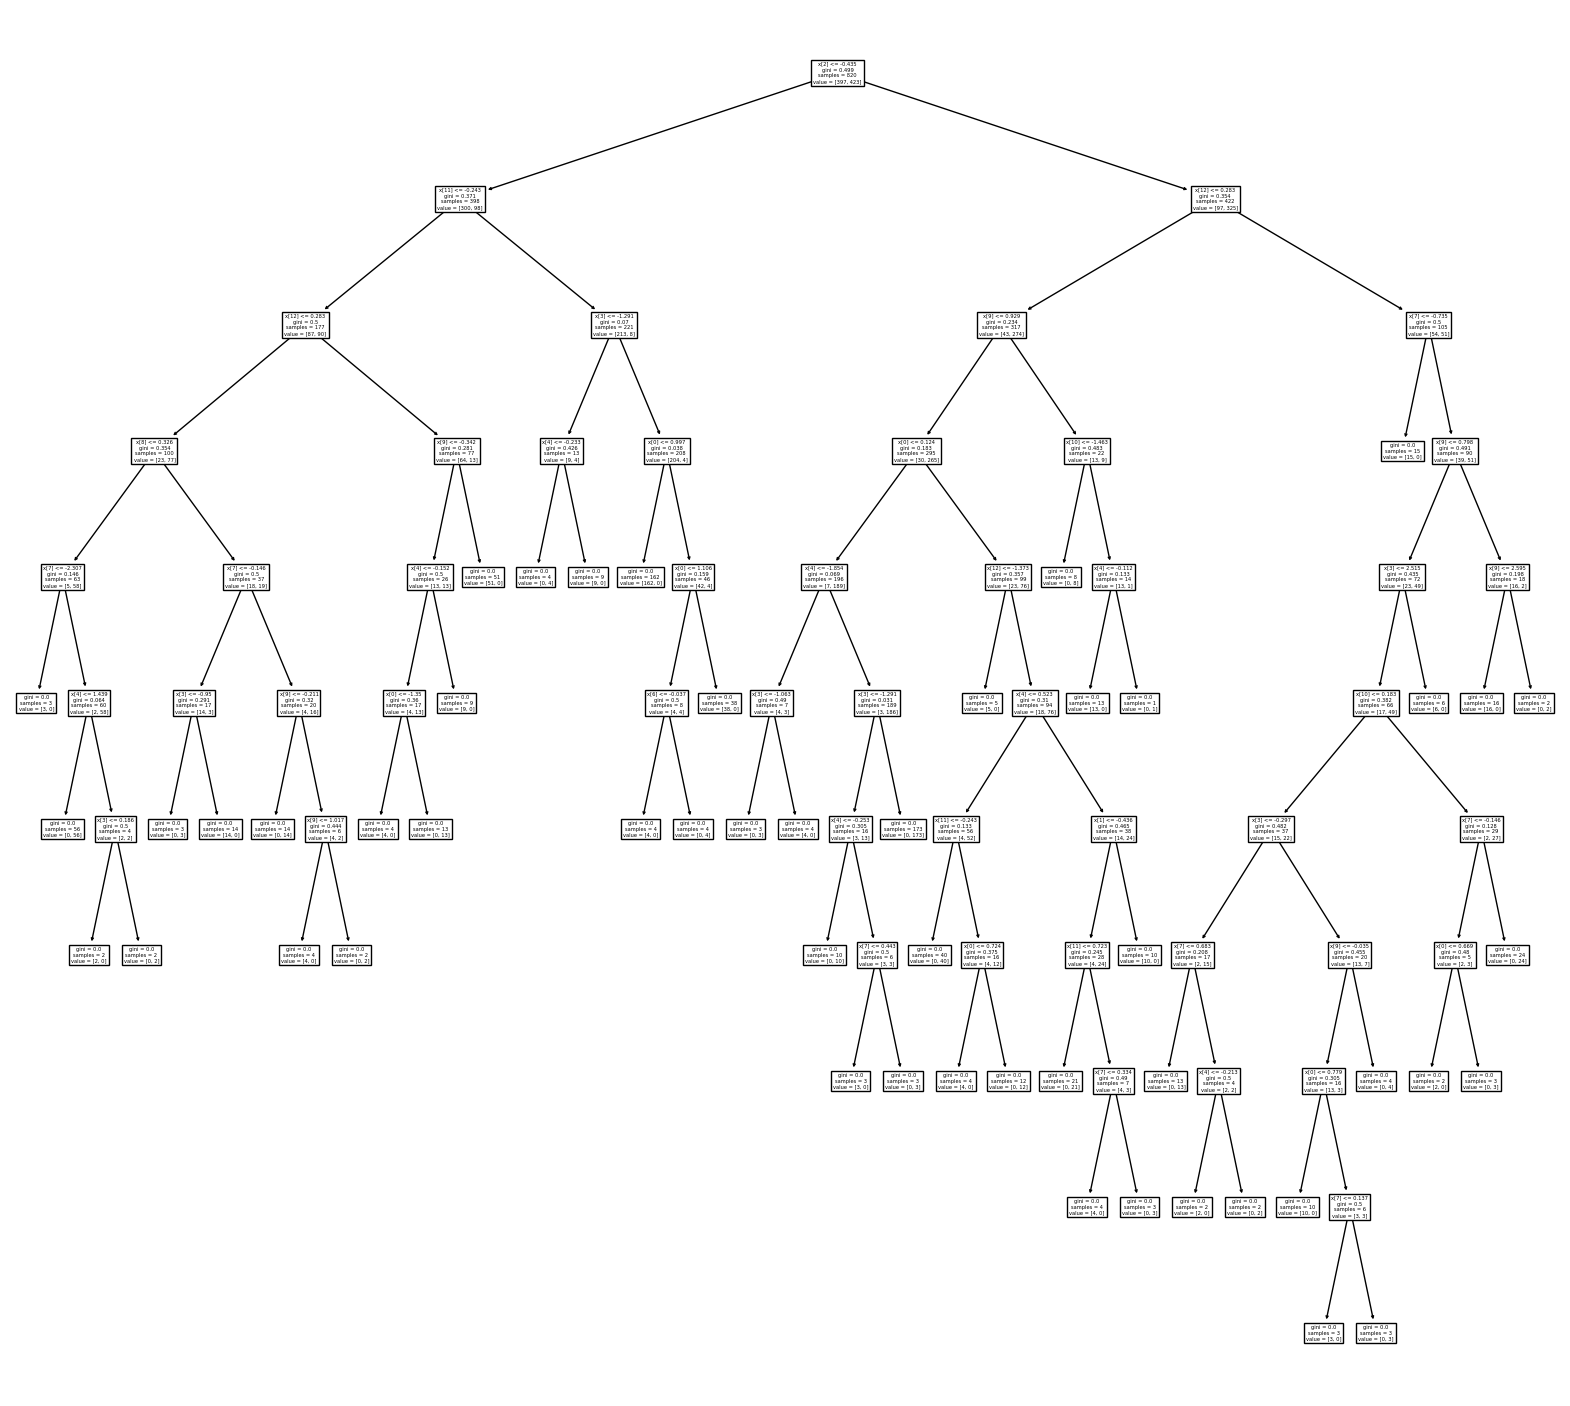

In [96]:
plt.figure(figsize=(20,18))
tree.plot_tree(best_gini) 

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Decision Tree Classifier with crierion Entropy</p>

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------


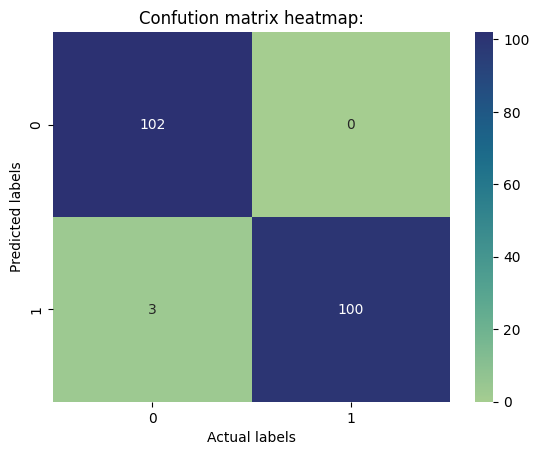

In [86]:
entropy_tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
evolution_models(entropy_tree)

[Text(0.5232142857142857, 0.9545454545454546, 'x[2] <= -0.435\nentropy = 0.999\nsamples = 820\nvalue = [397, 423]'),
 Text(0.2761904761904762, 0.8636363636363636, 'x[11] <= -0.243\nentropy = 0.805\nsamples = 398\nvalue = [300, 98]'),
 Text(0.19047619047619047, 0.7727272727272727, 'x[12] <= 0.283\nentropy = 1.0\nsamples = 177\nvalue = [87, 90]'),
 Text(0.09523809523809523, 0.6818181818181818, 'x[8] <= 0.326\nentropy = 0.778\nsamples = 100\nvalue = [23, 77]'),
 Text(0.0380952380952381, 0.5909090909090909, 'x[7] <= -2.307\nentropy = 0.4\nsamples = 63\nvalue = [5, 58]'),
 Text(0.01904761904761905, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05714285714285714, 0.5, 'x[4] <= 1.439\nentropy = 0.211\nsamples = 60\nvalue = [2, 58]'),
 Text(0.0380952380952381, 0.4090909090909091, 'entropy = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.0761904761904762, 0.4090909090909091, 'x[9] <= -0.386\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.05714285714285714, 0.3181818181818182

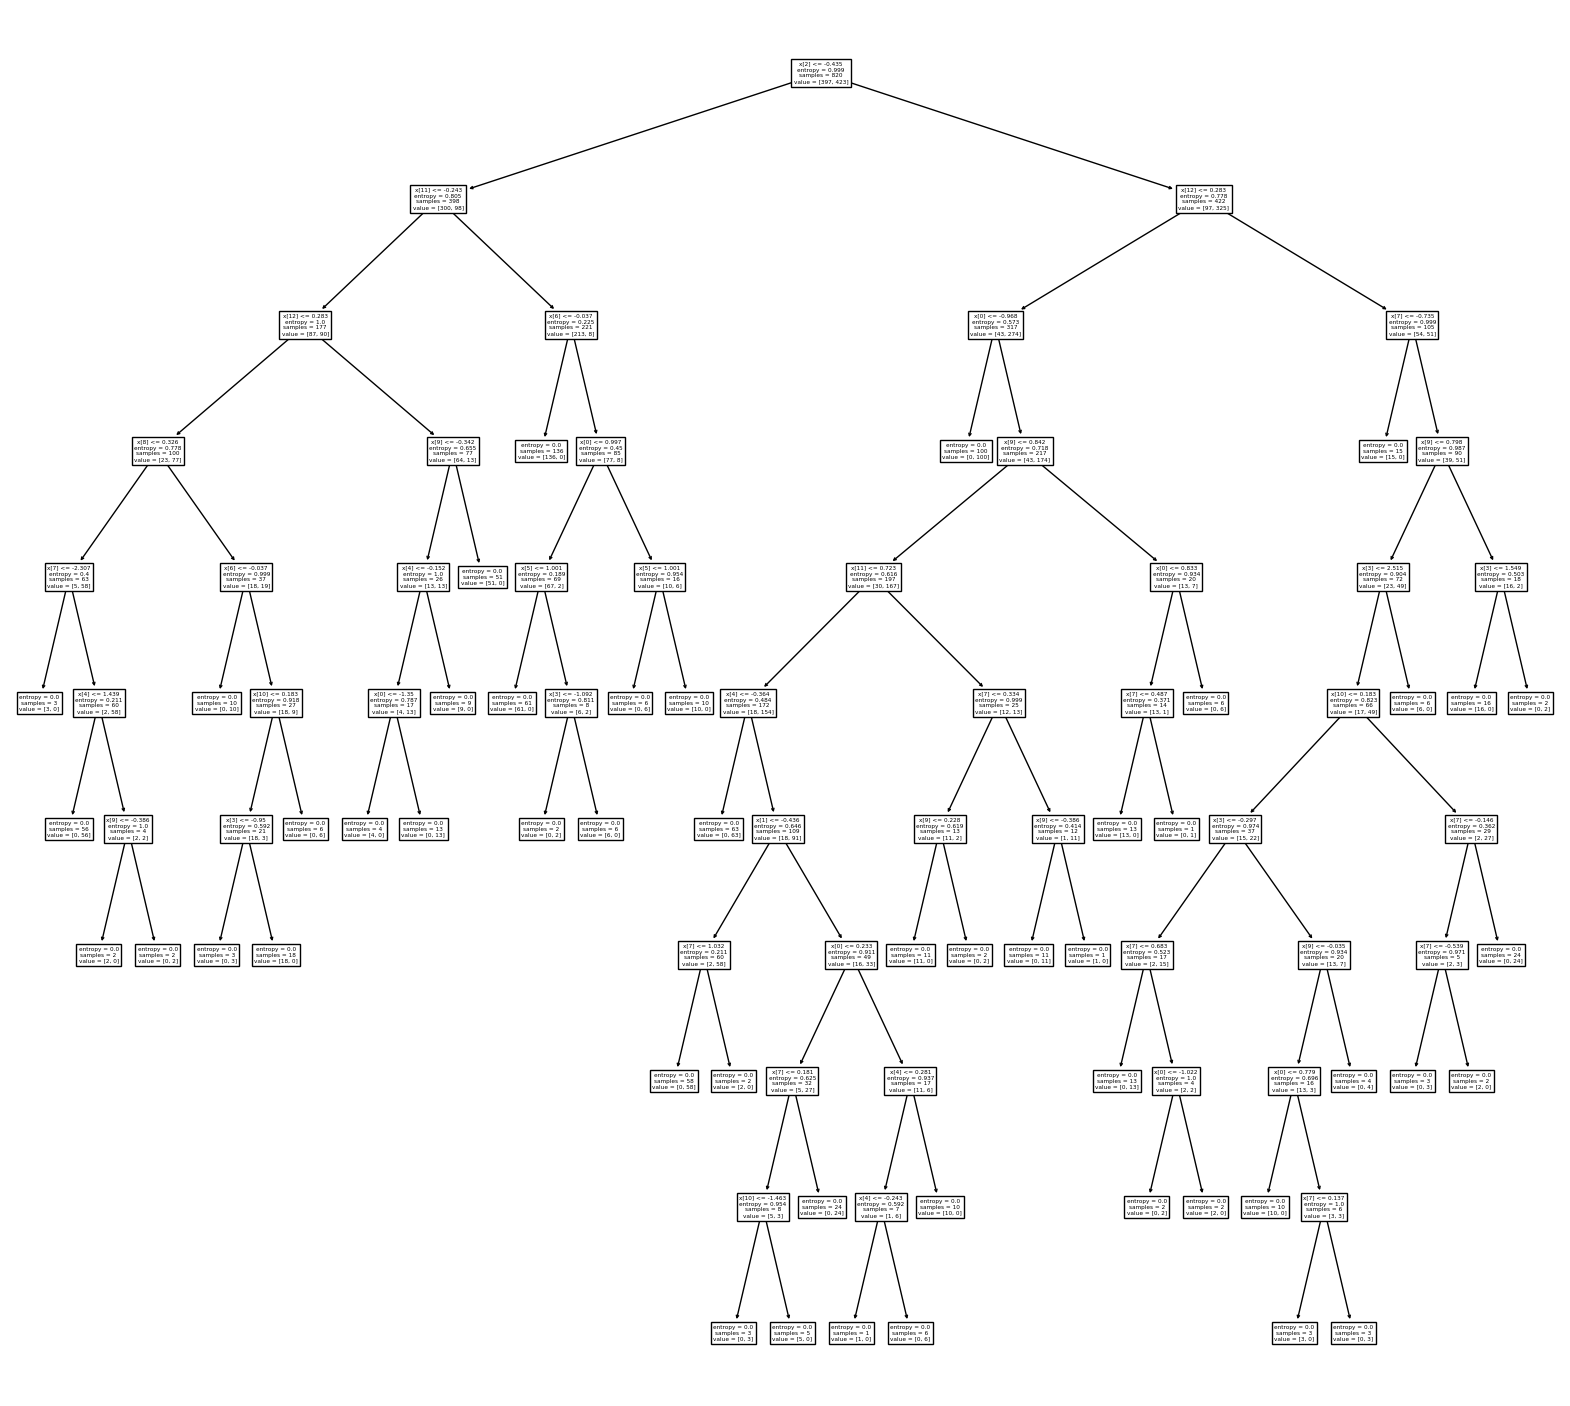

In [87]:
plt.figure(figsize=(20,18))
tree.plot_tree(entropy_tree) 

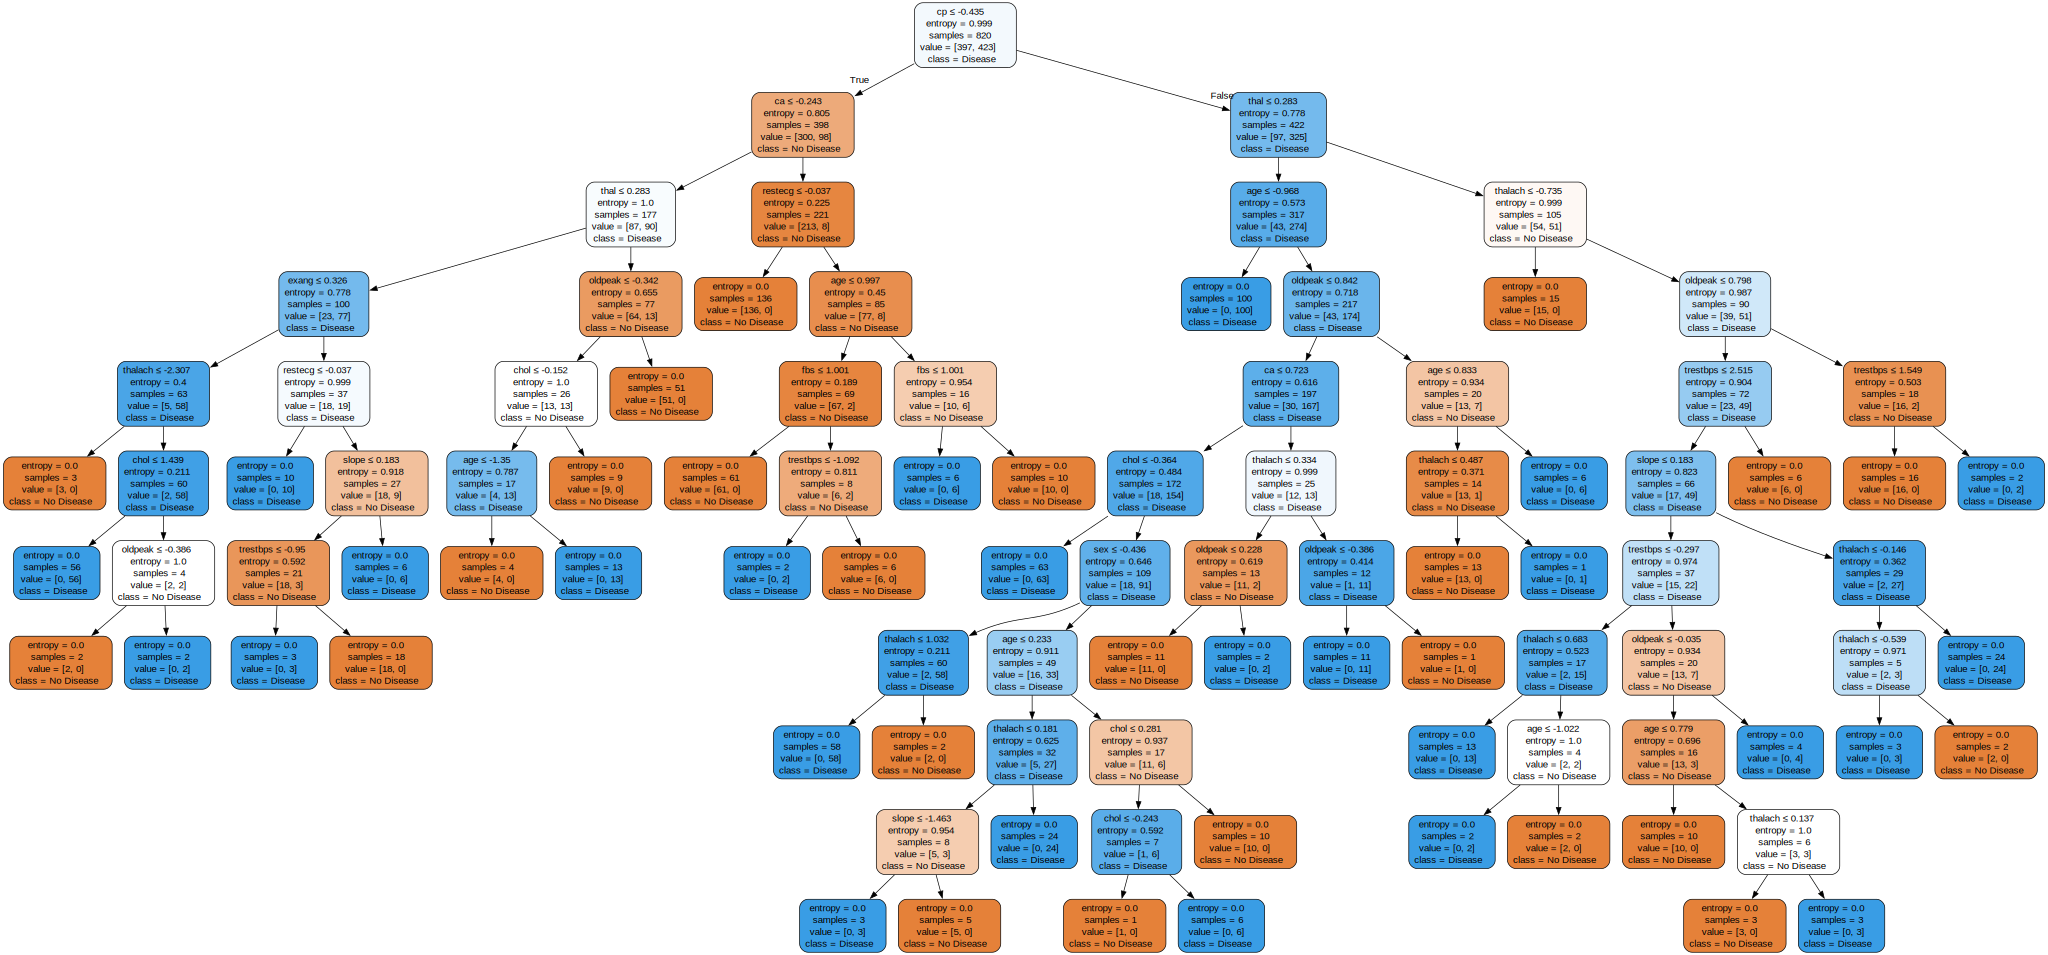

In [88]:
dot_data = tree.export_graphviz(entropy_tree, out_file=None, 
                              feature_names=feature_names,  
                              class_names=class_names,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data)
graph 

### `Apply Grid Search to adjust the hyperparameters combined with the Entropy`

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best mean cross-validation accuracy: 97.93 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------


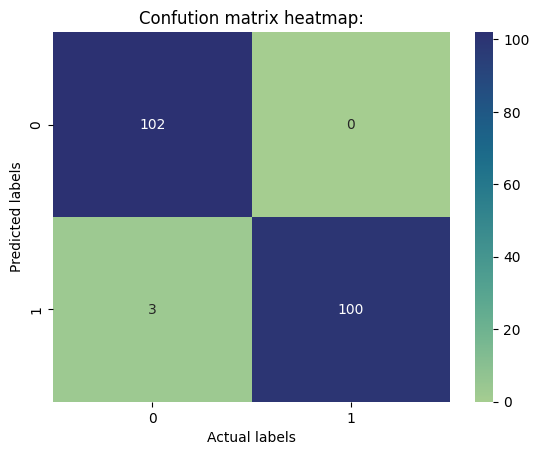

In [97]:
gr_entropy = DecisionTreeClassifier(criterion='entropy')

param_grid = {
    'max_depth': [3, 5, 10, None],  # Limit the depth of the tree to avoid overfitting.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split the node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf
    'max_features': [None, 'sqrt', 'log2']  # These characteristics are considered when finding the best way to divide
}

best_entropy = Gridsearch_params(X_train, y_train, gr_entropy, param_grid)
evolution_models(best_entropy)

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Decision Tree Classifier with Random Forest</p>

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------


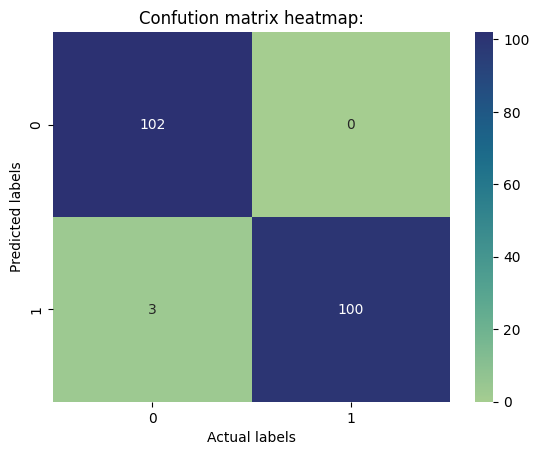

In [89]:
rf_tree = RandomForestClassifier().fit(X_train, y_train)
evolution_models(rf_tree)

### `Apply Grid Search to tune hyperparameters in the RandomForest model`

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best mean cross-validation accuracy: 98.41 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------


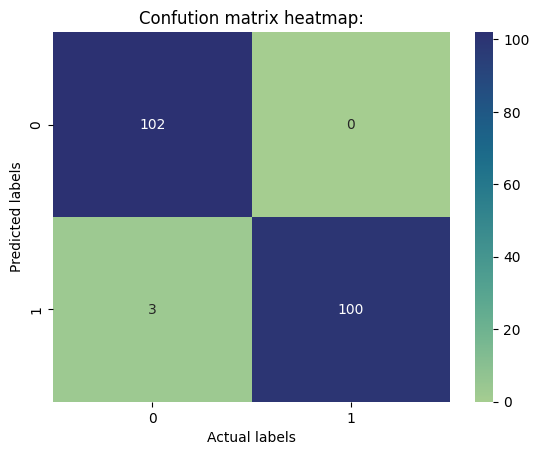

In [99]:
rf_base = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['entropy', 'gini']
}
best_rf = Gridsearch_params(X_train, y_train, rf_base, param_grid)
evolution_models(best_rf)